# Import dependencies and mnist dataset

In [57]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow.examples.tutorials.mnist as mnist

# Load dataset as a tensor of 55000x784 (samples, dimensions)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)


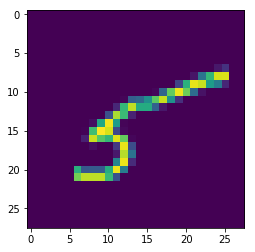

In [58]:
mnist_dataset = mnist.input_data.read_data_sets("MNIST_data/", one_hot=True)
images = mnist_dataset.train.images
print (images.shape)
random_image_sample_index = random.randint(0,55000)
plt.imshow(images[random_image_sample_index,:].reshape(28,28))
plt.show()

# Building blocks

In [70]:
def xavier_init(shape):
    pass

def weight(shape, name):
    return tf.Variable(tf.truncated_normal(shape=(shape), mean=0., stddev=0.01), dtype=tf.float32, name=name)
    
def bias(shape, name):
    return tf.Variable(tf.zeros(shape), dtype=tf.float32, name=name)

# Generator MLP Network

In [71]:
gW1 = weight([100,128],'gW1')
gb1 = bias([128], 'gb1')
gW2 = weight([128, 784], 'gW2')
gb2 = bias([784], 'gb2')
theta_G = [gW1, gb1, gW2, gb2]
def generator(z):
    h1 = tf.nn.relu(tf.matmul(z, gW1) + gb1)
    gen_image = tf.nn.sigmoid(tf.matmul(h1, gW2) + gb2)
    return gen_image

# Discriminator MLP Network

In [72]:
dW1 = weight([784, 128], 'dW1')
db1 = bias([128], 'db1')
dW2 = weight([128, 1], 'dW2')
db2 = bias([1], 'db2')
theta_D = [dW1, db1, dW2, db2]
def critic(X):    
    h1 = tf.nn.relu(tf.matmul(X, dW1) + db1)
    logit = tf.matmul(h1, dW2) + db2
    logit_prob = tf.nn.sigmoid(logit)
    return logit_prob

# Define placeholders

In [75]:
z = tf.placeholder(shape=[None, 100], dtype=tf.float32, name='input_noise')
true_images = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='true_images')

# Define Loss as Specified in GAN, Ian Goodfellow

In [76]:
G_out = generator(z)
D_fake = critic(G_out)
D_true = critic(true_images)
critic_loss = -tf.reduce_mean(tf.log(D_true) + tf.log(1 - D_fake))
generator_loss = tf.reduce_mean(tf.log(1 - D_fake))

# Define Optimizers - We'll use Adam

In [82]:
D_opt = tf.train.AdamOptimizer().minimize(critic_loss, var_list=theta_D)
G_opt = tf.train.AdamOptimizer().minimize(generator_loss, var_list=theta_G)

# Sample z (noise) ~ N(0,1)

In [83]:
def sample_z(shape):
    return np.random.normal(0., 1., shape)

# Train the GAN

In [84]:
sess = tf.InteractiveSession()

G_loss: -0.6509515047073364, D_loss: 1.3856120109558105


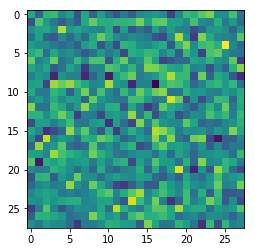

G_loss: -0.0022025981452316046, D_loss: 0.004309486597776413


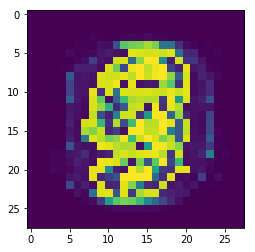

G_loss: -0.0054400041699409485, D_loss: 0.04892755299806595


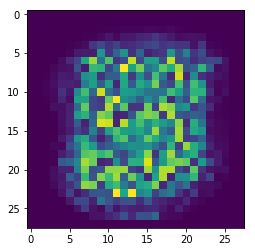

G_loss: -0.00791382510215044, D_loss: 0.020160958170890808


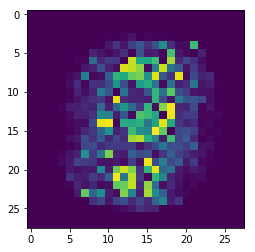

G_loss: -0.03831750899553299, D_loss: 0.3103238344192505


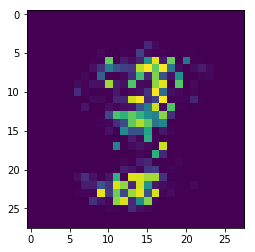

G_loss: -0.6894207000732422, D_loss: 1.1253669261932373


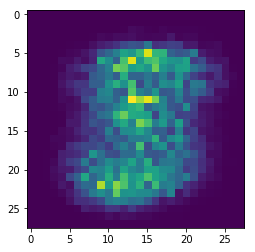

G_loss: -0.06150359660387039, D_loss: 0.34415942430496216


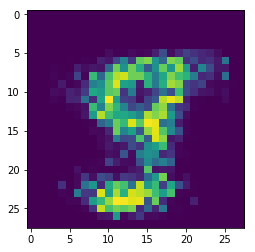

G_loss: -0.2857808768749237, D_loss: 0.5216172337532043


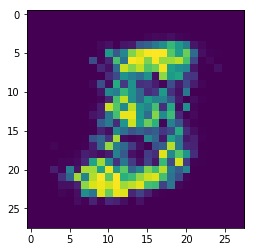

G_loss: -0.39030253887176514, D_loss: 1.09489107131958


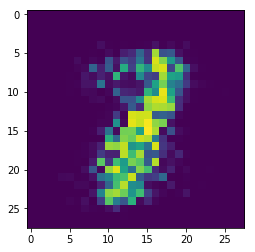

G_loss: -0.07290197163820267, D_loss: 0.24393659830093384


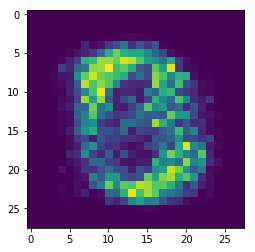

G_loss: -0.5033904314041138, D_loss: 1.2065279483795166


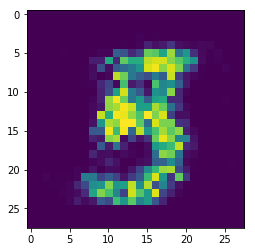

G_loss: -0.20488578081130981, D_loss: 0.4653984308242798


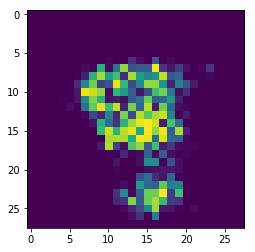

G_loss: -0.0913587287068367, D_loss: 0.4362718462944031


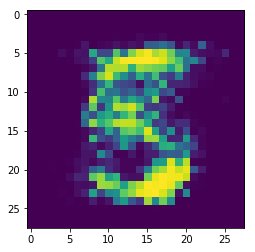

G_loss: -0.5373258590698242, D_loss: 0.8312256336212158


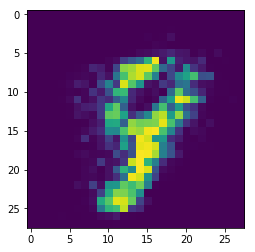

G_loss: -0.8111329078674316, D_loss: 1.4232845306396484


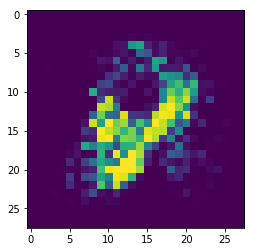

G_loss: -0.41739422082901, D_loss: 1.2917336225509644


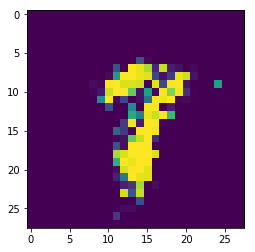

G_loss: -0.7521792650222778, D_loss: 1.5838284492492676


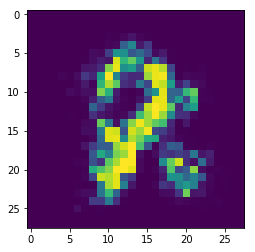

G_loss: -0.4337691366672516, D_loss: 1.4123148918151855


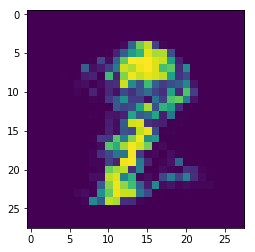

G_loss: -0.6684502959251404, D_loss: 0.766718864440918


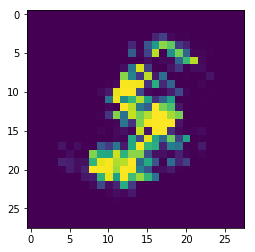

G_loss: -0.4499472975730896, D_loss: 1.1417043209075928


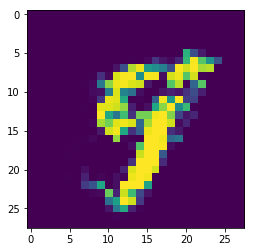

G_loss: -0.45175111293792725, D_loss: 0.9220656156539917


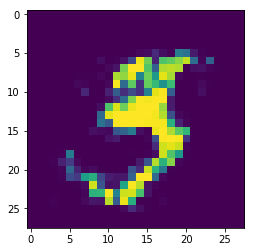

G_loss: -0.40453436970710754, D_loss: 1.4345757961273193


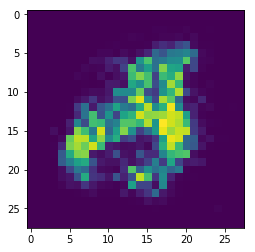

G_loss: -0.516343355178833, D_loss: 1.0979726314544678


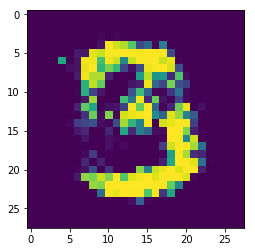

G_loss: -0.40448397397994995, D_loss: 0.9985437393188477


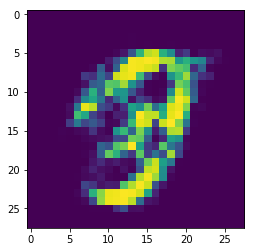

G_loss: -0.34611523151397705, D_loss: 1.032979130744934


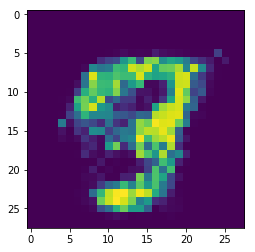

G_loss: -0.7112916707992554, D_loss: 1.4691531658172607


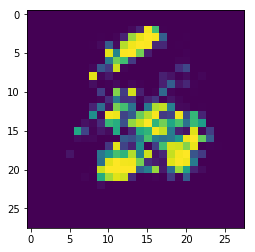

G_loss: -0.5297701954841614, D_loss: 1.1849374771118164


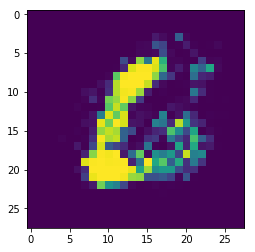

G_loss: -0.5253278017044067, D_loss: 1.2474052906036377


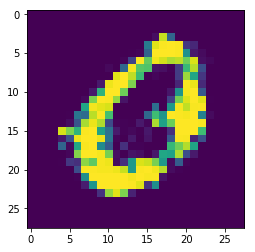

G_loss: -0.5696324110031128, D_loss: 1.2050187587738037


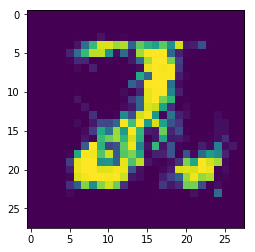

G_loss: -0.6248658299446106, D_loss: 1.2267810106277466


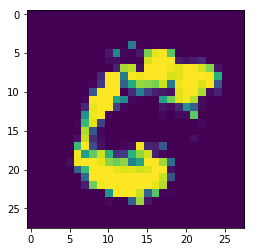

G_loss: -0.43339645862579346, D_loss: 1.2083319425582886


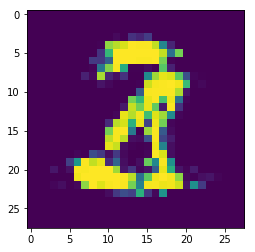

G_loss: -0.5729348063468933, D_loss: 1.0556633472442627


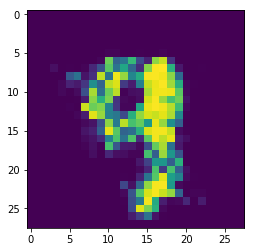

G_loss: -0.5333092212677002, D_loss: 1.2753552198410034


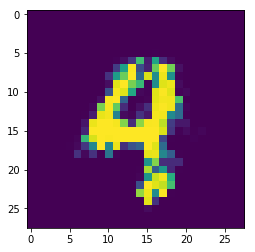

G_loss: -0.5553942918777466, D_loss: 1.0160019397735596


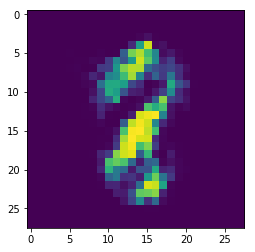

G_loss: -0.6298732757568359, D_loss: 0.9289982318878174


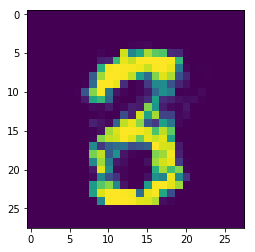

G_loss: -0.6100056171417236, D_loss: 1.2527763843536377


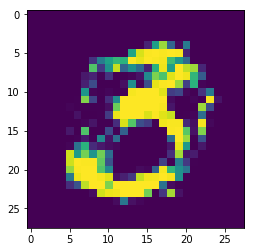

G_loss: -0.37540900707244873, D_loss: 1.3382728099822998


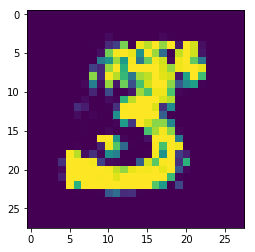

G_loss: -0.7786068916320801, D_loss: 1.0358490943908691


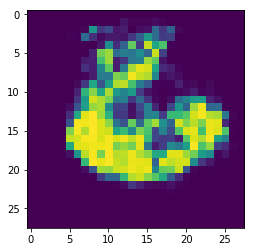

G_loss: -0.59489506483078, D_loss: 1.1690504550933838


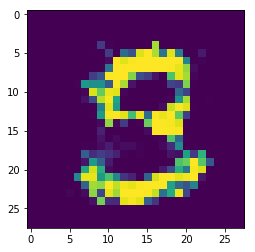

G_loss: -0.5246572494506836, D_loss: 1.1797386407852173


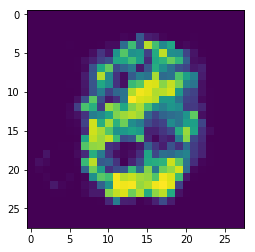

G_loss: -0.4440087378025055, D_loss: 1.208957552909851


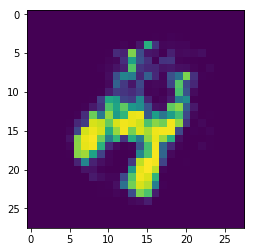

G_loss: -0.4058438539505005, D_loss: 1.334265947341919


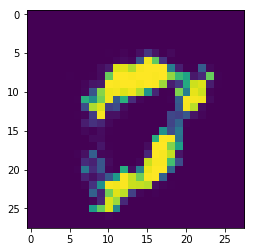

G_loss: -0.545286238193512, D_loss: 1.2279597520828247


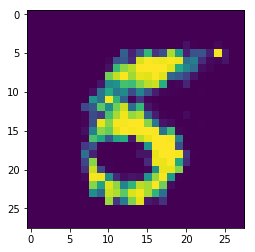

G_loss: -0.4617801904678345, D_loss: 1.1366937160491943


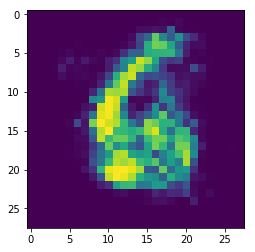

G_loss: -0.5123191475868225, D_loss: 1.3713958263397217


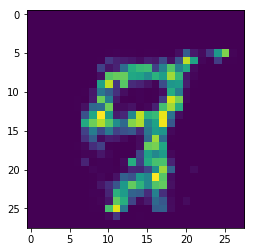

G_loss: -0.616982638835907, D_loss: 1.3799309730529785


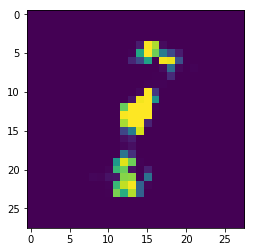

G_loss: -0.7484062910079956, D_loss: 1.3178553581237793


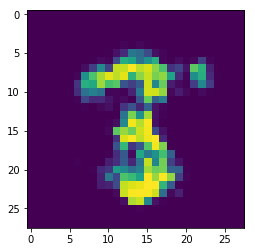

G_loss: -0.5559945106506348, D_loss: 1.2862625122070312


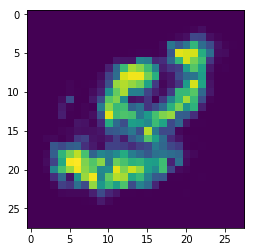

G_loss: -0.5335910320281982, D_loss: 1.0436023473739624


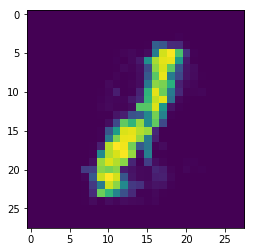

G_loss: -0.5647008419036865, D_loss: 1.1791486740112305


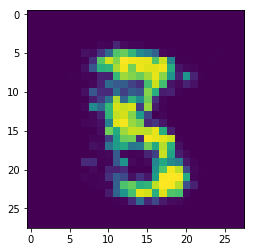

G_loss: -0.614183783531189, D_loss: 1.0995171070098877


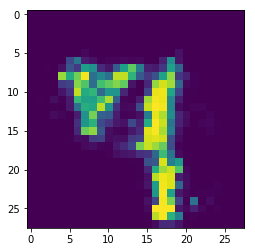

G_loss: -0.5792660713195801, D_loss: 1.1119630336761475


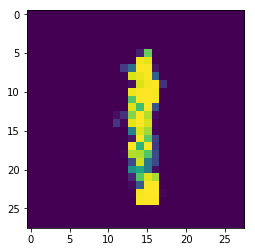

G_loss: -0.5041635632514954, D_loss: 0.9674376249313354


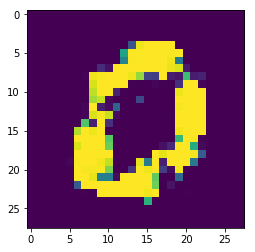

G_loss: -0.43372559547424316, D_loss: 1.155774712562561


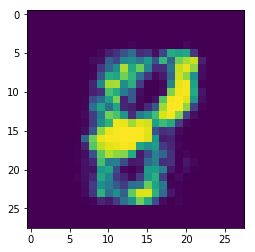

G_loss: -0.4493480920791626, D_loss: 1.0799672603607178


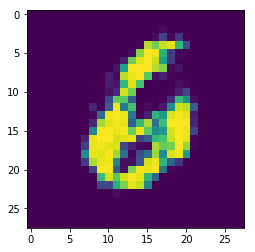

G_loss: -0.45835161209106445, D_loss: 0.9870172739028931


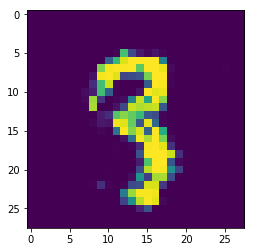

G_loss: -0.5334991216659546, D_loss: 1.0080574750900269


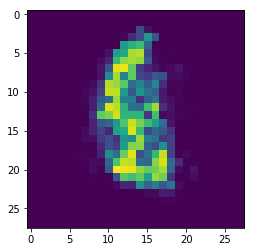

G_loss: -0.44538822770118713, D_loss: 1.2393399477005005


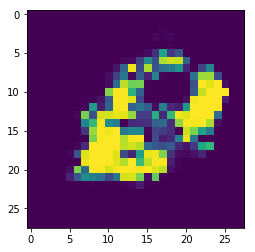

G_loss: -0.5220434665679932, D_loss: 1.1129796504974365


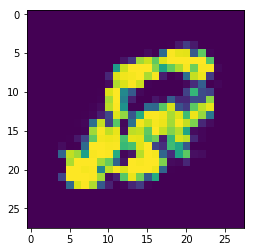

G_loss: -0.37040841579437256, D_loss: 1.0966161489486694


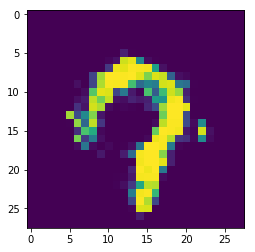

G_loss: -0.5321844220161438, D_loss: 1.1309845447540283


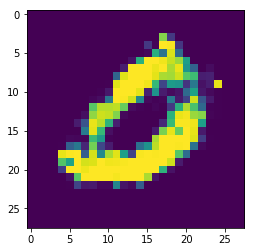

G_loss: -0.6225441694259644, D_loss: 1.043904185295105


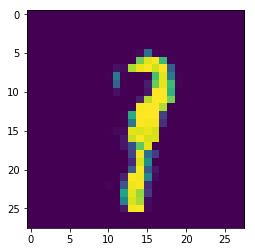

G_loss: -0.6350146532058716, D_loss: 1.2027230262756348


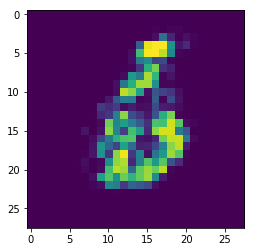

G_loss: -0.37029480934143066, D_loss: 0.9354459047317505


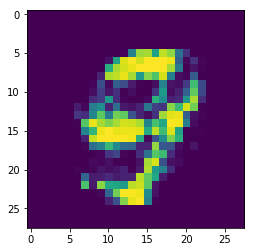

G_loss: -0.5033746361732483, D_loss: 1.0523104667663574


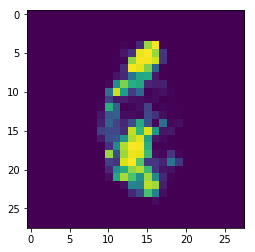

G_loss: -0.5227596759796143, D_loss: 1.1160386800765991


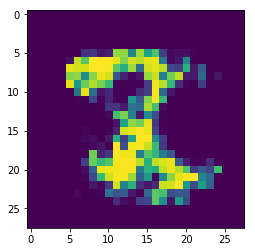

G_loss: -0.5975324511528015, D_loss: 0.8709317445755005


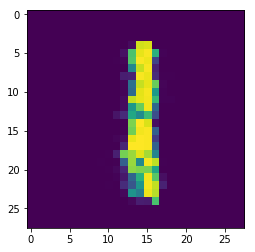

G_loss: -0.3707175552845001, D_loss: 0.9983899593353271


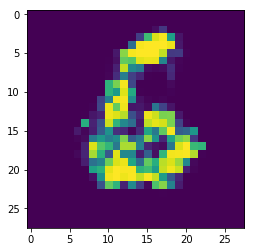

G_loss: -0.5953304171562195, D_loss: 0.9092739820480347


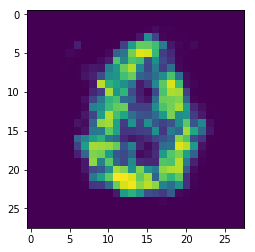

G_loss: -0.5866594314575195, D_loss: 0.9308952689170837


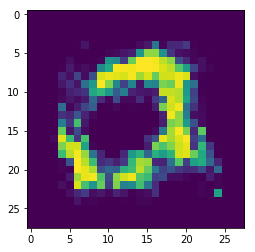

G_loss: -0.5022004842758179, D_loss: 0.9815337657928467


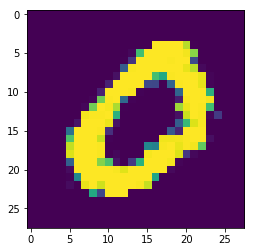

G_loss: -0.5082970261573792, D_loss: 0.9462023973464966


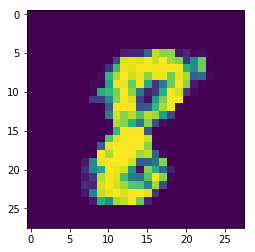

G_loss: -0.3846789598464966, D_loss: 1.0024056434631348


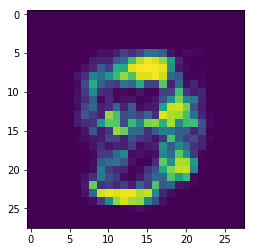

G_loss: -0.5814687013626099, D_loss: 1.1130642890930176


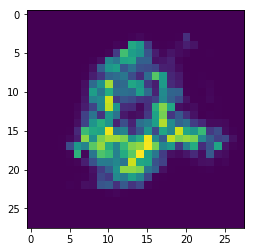

G_loss: -0.3258669376373291, D_loss: 1.1699398756027222


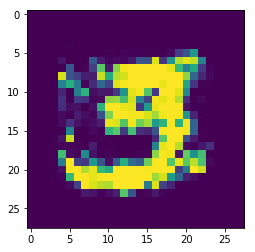

G_loss: -0.4487515389919281, D_loss: 0.9819799065589905


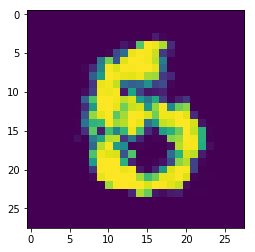

G_loss: -0.397796630859375, D_loss: 0.9169971942901611


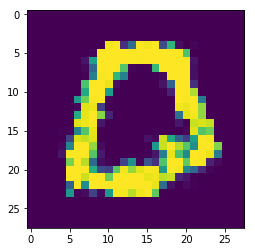

G_loss: -0.6388880014419556, D_loss: 1.2223533391952515


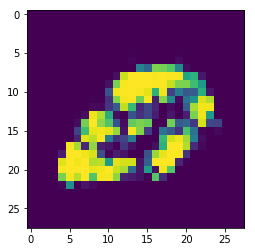

G_loss: -0.5529323816299438, D_loss: 0.8619050979614258


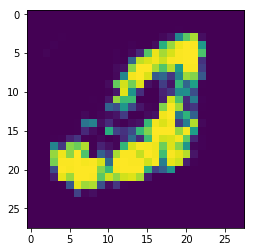

G_loss: -0.5554591417312622, D_loss: 1.4015443325042725


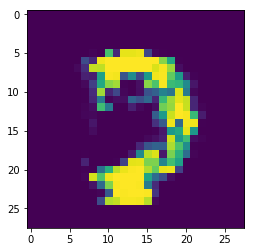

G_loss: -0.5457631945610046, D_loss: 0.9490009546279907


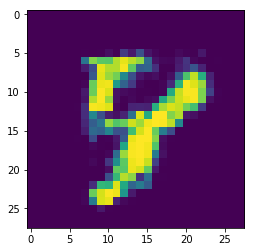

G_loss: -0.6249086856842041, D_loss: 1.0729985237121582


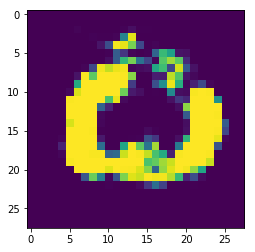

G_loss: -0.6174931526184082, D_loss: 0.8811755180358887


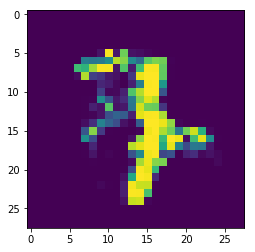

G_loss: -0.4475516080856323, D_loss: 1.2108314037322998


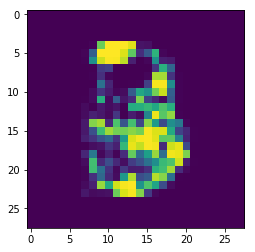

G_loss: -0.47059500217437744, D_loss: 1.0789278745651245


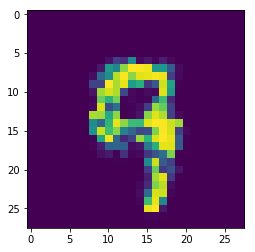

G_loss: -0.5264648795127869, D_loss: 1.2663092613220215


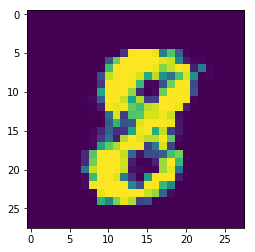

G_loss: -0.3967915177345276, D_loss: 1.139798879623413


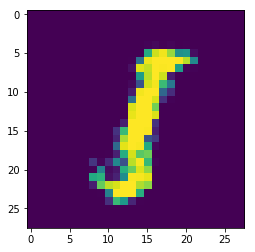

G_loss: -0.5965665578842163, D_loss: 0.9041528701782227


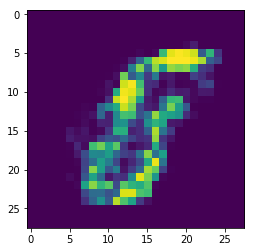

G_loss: -0.5925125479698181, D_loss: 0.7096697092056274


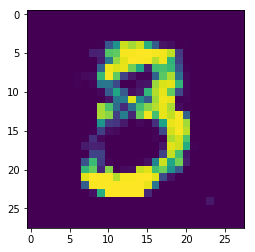

G_loss: -0.8205990791320801, D_loss: 0.9625236988067627


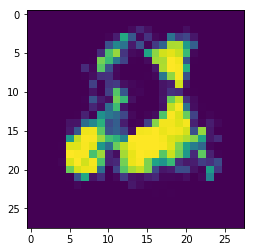

G_loss: -0.5986965894699097, D_loss: 0.8453578948974609


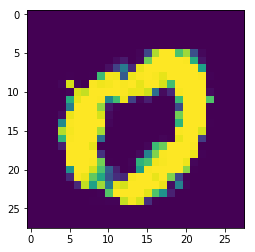

G_loss: -0.4084945619106293, D_loss: 0.916771411895752


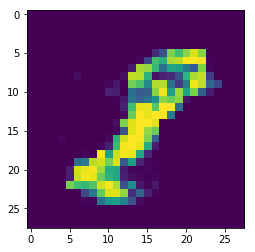

G_loss: -0.5944657325744629, D_loss: 1.1567530632019043


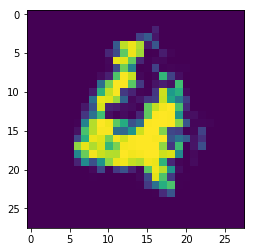

G_loss: -0.410739004611969, D_loss: 1.073837399482727


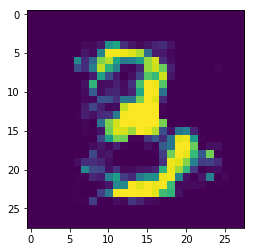

G_loss: -0.5836334228515625, D_loss: 1.111553430557251


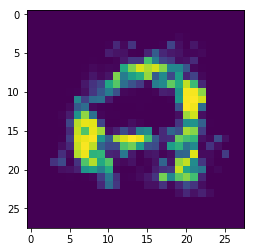

G_loss: -0.7077575325965881, D_loss: 1.0535926818847656


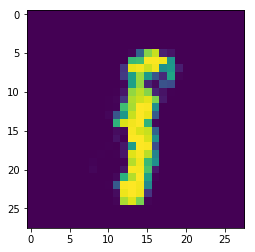

G_loss: -0.3269899785518646, D_loss: 1.0300123691558838


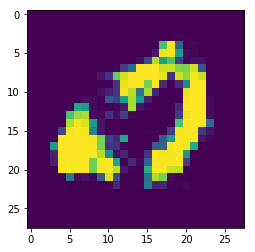

G_loss: -0.5534980297088623, D_loss: 1.0424175262451172


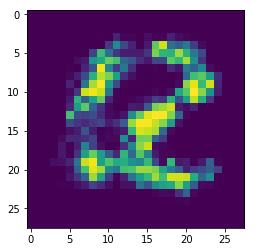

G_loss: -0.428745836019516, D_loss: 1.0572842359542847


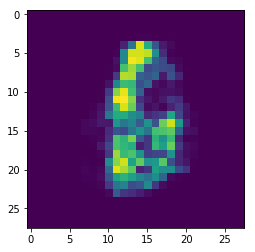

G_loss: -0.4136504530906677, D_loss: 0.7966828942298889


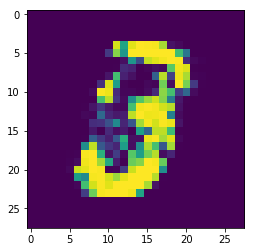

In [85]:
init_op = tf.global_variables_initializer().run()
G_history = []
D_history = []


for i in range(100000):
    generated_image = sess.run([G_out], feed_dict={z:sample_z([1,100])})
    _X,_ = mnist_dataset.train.next_batch(32)
    _,D_loss = sess.run([D_opt, critic_loss], feed_dict={true_images: _X, z:sample_z((32,100))})
    _,G_loss = sess.run([G_opt, generator_loss], feed_dict={z:sample_z((32,100))})
    G_history.append(G_loss)
    D_history.append(D_loss)
    if i%1000 == 0:
        print ("G_loss: {}, D_loss: {}".format(G_loss, D_loss))
        plt.imshow(generated_image[0].reshape(28,28))
        plt.show()

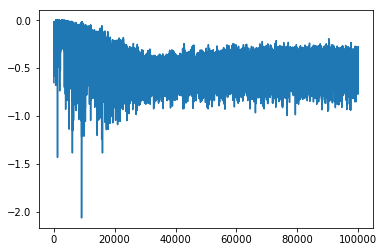

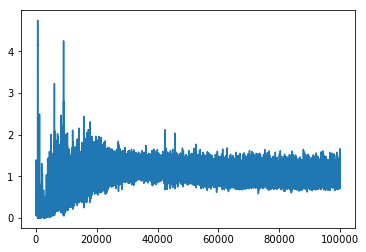

In [86]:
plt.plot(G_history)
plt.show()
plt.plot(D_history)
plt.show()